In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("cars24-car-price-cleaned.csv")

In [4]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [5]:
df.shape

(19820, 18)

In [6]:
df['make'].nunique(), df['model'].nunique()

(41, 3233)

In [7]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [8]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [9]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [10]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [11]:
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((15856, 17), (3964, 17))

In [14]:
y_train.shape

(15856,)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_new = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_new, columns = X_train.columns)

In [16]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [17]:
X_new = scaler.transform(X_test) # only transform. no fit_transform
X_test = pd.DataFrame(X_new, columns = X_test.columns)

In [18]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.763435,0.502456,0.499903,-0.026017,-0.299979,-0.763435,-0.542630,-0.456837,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,0.137011,0.082550,0.149891,0.045857,-0.210409,-0.137011,-0.284819,-0.330968,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
2,0.450223,0.307257,1.820617,0.045857,0.009035,-0.450223,-0.163433,-0.206702,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,0.450223,-0.623074,-0.186121,-0.534965,-0.212649,-0.450223,-0.163433,-0.176406,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-0.802626,0.048503,0.331897,-0.925417,-0.696322,0.802626,-0.521072,-0.927358,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [19]:
def predict(X, weights):
    
    return np.dot(X,weights)

In [20]:
def loss(X, y, weights):
    
    y_hat = predict(X, weights)
    err = np.mean((y - y_hat)**2)

    return err

In [21]:
def gradients(X, y, weights):

    y_hat = predict(X, weights)
    grads = 2*np.dot(X.T, y_hat - y)/len(y)

    return grads

In [22]:
def gradient_descent(X, y, learning_rate=0.1, n_itrs=100):

    n, d = X.shape
    error_list = []

    # Step 1: Initialization
    w = np.random.rand(d)

    for _ in range(n_itrs):

        e = loss(X, y, w)
        error_list.append(e)
        
        # Step 2: Calculate derivatives
        dW = gradients(X, y, w)

        # Step 3: Update equation
        w = w - learning_rate*dW

    return w, error_list

In [23]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - y_true.mean())**2)
    score = 1 - (numerator/denominator)
    return score

In [24]:
W_best, error_list = gradient_descent(X_train, y_train)

In [25]:
W_best

array([ 1.0956301 , -0.14355373, -0.16215204,  0.09725519,  0.16826614,
        0.47785715,  0.36626772,  3.77918439, -0.06508883, -0.01439078,
        0.37720483,  0.05673317,  0.05521155,  0.19883263, -0.06766512,
        0.04239254,  0.03177403])

In [26]:
error_list[-5:]

[np.float64(44.57192742644542),
 np.float64(44.571241810747445),
 np.float64(44.57058439411763),
 np.float64(44.56995387096788),
 np.float64(44.56934899943191)]

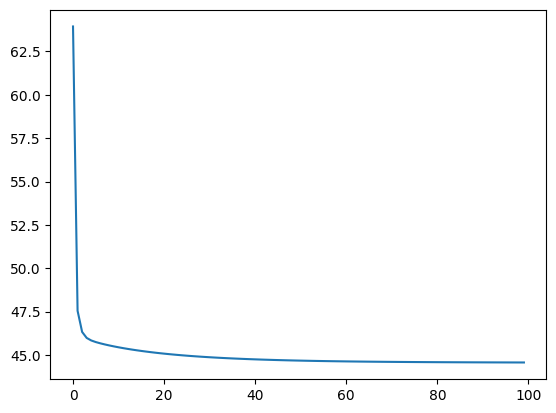

In [27]:
plt.plot(error_list)

In [28]:
y_train_pred = predict(X_train, W_best)
y_train_pred[:10]

array([-2.66397694,  4.50933275,  0.3114482 , -0.55416914, -4.39280651,
        0.93748418, -1.64806226, -0.53524638, -7.44714091, -4.17683206])

In [29]:
r2_score(y_train, y_train_pred)

np.float64(-0.9107329463110052)

In [40]:
# Because w0 is not considered

# Incorporated w0

In [32]:
#x0 = pd.DataFrame([1]*len(X_train), columns = ['x0'])

In [33]:
# Incorporated w0
#X_train_new = pd.concat([x0, X_train], axis=1)
#X_train_new.head()

In [34]:
#W_best, error_list = gradient_descent(X_train_new, y_train)

In [35]:
#W_best.shape

In [36]:
#plt.plot(error_list)

In [37]:
#error_list[-5:]

In [38]:
#y_train_pred = predict(X_train_new, W_best)
#y_train_pred[:10]

In [39]:
#r2_score(y_train, y_train_pred)